<a href="https://colab.research.google.com/github/baut-jc/DDDS-My-Projects/blob/main/Project-4/Project_4_Spotify_fnl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 4: Spotify

## Problem Definition


State the business problem. Translate the business problem into a Data Science problem by stating what kind of problem it is ( supervised vs unsupervised ) and whether it is a classification, regression, or clustering problem.

**Business Problem:** A record label or artist wants to forecast the potential popularity of a new song *before* its release to make informed marketing and strategic decisions.

**Data Science Problem:** This is a **supervised regression** task.

* It's **supervised** because we have a dataset
with features and a known target variable (*"Popularity"*).

* It's **regression** because "Popularity" is a continuous numerical value, not a category.

**Primary Goal:** Minimize the Root Mean Squared Error (RMSE) when predicting the "Popularity" score.

**Secondary Goal:** Identify which audio features are most influential in predicting popularity.

## Data Collection/Sources


#### Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import pickle

In [ ]:
url = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.4-Spotify/Data/Spotify.csv"
!curl -s -I {url}

HTTP/1.1 200 OK
x-amz-id-2: xBy9MDPjjZ+YYYBhvF6SoA5mWFxypI3kPJlvPH76TZz3qGG6750slifhjCxhIdhXQhWEc/G3L2I=
x-amz-request-id: MEHVXF4KV4F8019X
Date: Tue, 08 Jul 2025 13:03:59 GMT
Last-Modified: Wed, 04 Oct 2023 17:23:56 GMT
ETag: "65b9875b11e0d7ea03ee2af024f45e99"
x-amz-server-side-encryption: AES256
Accept-Ranges: bytes
Content-Type: text/csv
Content-Length: 738124
Server: AmazonS3



In [ ]:
!curl -s -O {url}

In [ ]:
ls -la

total 740
drwxr-xr-x 1 root root   4096 Jul  8 13:03 ./
drwxr-xr-x 1 root root   4096 Jul  8 13:03 ../
drwxr-xr-x 4 root root   4096 Jul  4 13:34 .config/
drwxr-xr-x 1 root root   4096 Jul  4 13:34 sample_data/
-rw-r--r-- 1 root root 738124 Jul  8 13:03 Spotify.csv


In [ ]:
!head -1 Spotify.csv | tr , '\n' | cat -n

     1	Index
     2	Highest Charting Position
     3	Number of Times Charted
     4	Week of Highest Charting
     5	Song Name
     6	Streams
     7	Artist
     8	Artist Followers
     9	Song ID
    10	Genre
    11	Release Date
    12	Weeks Charted
    13	Popularity
    14	Danceability
    15	Energy
    16	Loudness
    17	Speechiness
    18	Acousticness
    19	Liveness
    20	Tempo
    21	Duration (ms)
    22	Valence
    23	Chord


#### S.H.I.D

In [ ]:
df = pd.read_csv( url )
df.shape

(1556, 23)

In [ ]:
df.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [ ]:
df.info()

# many objects that may need to be converted into --> ints/float(numeric)
# .drop() --> Song ID,Index,
# Chord may nto be necessary; but what effect might it do with Streams... maybe even Energy and Liveness.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1556 non-null   int64 
 1   Highest Charting Position  1556 non-null   int64 
 2   Number of Times Charted    1556 non-null   int64 
 3   Week of Highest Charting   1556 non-null   object
 4   Song Name                  1556 non-null   object
 5   Streams                    1556 non-null   object
 6   Artist                     1556 non-null   object
 7   Artist Followers           1556 non-null   object
 8   Song ID                    1556 non-null   object
 9   Genre                      1556 non-null   object
 10  Release Date               1556 non-null   object
 11  Weeks Charted              1556 non-null   object
 12  Popularity                 1556 non-null   object
 13  Danceability               1556 non-null   object
 14  Energy  

In [ ]:
df.describe().transpose().sort_values( by = ["mean"])

,count,mean,std,min,25%,50%,75%,max
Number of Times Charted,1556.0,10.668380,16.360546,1.0,1.00,4.0,12.00,142.0
Highest Charting Position,1556.0,87.744216,58.147225,1.0,37.00,80.0,137.00,200.0
Index,1556.0,778.500000,449.322824,1.0,389.75,778.5,1167.25,1556.0


## Data Cleaning


In [ ]:
df.nunique().sort_values(ascending = False)

# streams/song name could be the target
#will i know this feature that may have affected the target.

,0
Index,1556
Streams,1556
Song Name,1556
Song ID,1517
Duration (ms),1486
Tempo,1461
Loudness,1394
Acousticness,965
Weeks Charted,775
Speechiness,772


#### Data Types Conversion

In [ ]:
columns_to_drop = [
    'Index',
    'Song ID',
    'Week of Highest Charting',
    'Weeks Charted',
    'Artist Followers', # Target leakage
    'Streams' # Target leakage
]

cleaned_spotify_df = df.drop(columns=columns_to_drop) # Change df to spotify_df and cleaned_df to cleaned_spotify_df

cleaned_spotify_df.columns

Index(['Highest Charting Position', 'Number of Times Charted', 'Song Name',
       'Artist', 'Genre', 'Release Date', 'Popularity', 'Danceability',
       'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness',
       'Tempo', 'Duration (ms)', 'Valence', 'Chord'],
      dtype='object')

In [ ]:
cleaned_spotify_df.shape

(1556, 17)

In [ ]:
audio_features = ['Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence']
for col in audio_features:
  df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
cleaned_spotify_df['Popularity'] = pd.to_numeric(cleaned_spotify_df['Popularity'], errors='coerce')

In [ ]:
cleaned_spotify_df.dropna(subset=['Popularity'], inplace=True)

In [ ]:
cleaned_spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1545 entries, 0 to 1555
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Highest Charting Position  1545 non-null   int64  
 1   Number of Times Charted    1545 non-null   int64  
 2   Song Name                  1545 non-null   object 
 3   Artist                     1545 non-null   object 
 4   Genre                      1545 non-null   object 
 5   Release Date               1545 non-null   object 
 6   Popularity                 1545 non-null   float64
 7   Danceability               1545 non-null   object 
 8   Energy                     1545 non-null   object 
 9   Loudness                   1545 non-null   object 
 10  Speechiness                1545 non-null   object 
 11  Acousticness               1545 non-null   object 
 12  Liveness                   1545 non-null   object 
 13  Tempo                      1545 non-null   object 
 1

In [ ]:
cleaned_spotify_df.shape #1545 rows × 17 columns

(1545, 17)

In [ ]:
audio_features_numeric_check = [
    'Danceability', 'Energy', 'Loudness', 'Speechiness',
    'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence'
]
for col in audio_features_numeric_check:
    if col in cleaned_spotify_df.columns and cleaned_spotify_df[col].dtype == 'object':
        cleaned_spotify_df[col] = pd.to_numeric(cleaned_spotify_df[col], errors='coerce')

#### Remove NULLS

In [ ]:
#fill missing numeric values with median by column.

for col in cleaned_spotify_df.columns:
    if cleaned_spotify_df[col].dtype == 'float64' or cleaned_spotify_df[col].dtype == 'int64':
        # df[col].fillna(df[col].median(), inplace=True)
        cleaned_spotify_df.fillna({col: cleaned_spotify_df[col].median()}, inplace=True)

cleaned_spotify_df.isnull().sum()

,0
Highest Charting Position,0
Number of Times Charted,0
Song Name,0
Artist,0
Genre,0
Release Date,0
Popularity,0
Danceability,0
Energy,0
Loudness,0


#### Data Conversion

In [ ]:
cleaned_spotify_df['Release Date'] = pd.to_datetime(cleaned_spotify_df['Release Date'], errors='coerce')
cleaned_spotify_df['Release_Year'] = cleaned_spotify_df['Release Date'].dt.year
cleaned_spotify_df['Release_Month'] = cleaned_spotify_df['Release Date'].dt.month # Added Month extraction
# Note: If NaNs exist in 'Release Date' after coerce, you might want to fill or drop them if 'Release_Year'/'Release_Month' are critical for your model.

cleaned_spotify_df[['Release Date', 'Release_Year', 'Release_Month']].head()


Extracted Year and Month from Release Date:
  Release Date  Release_Year  Release_Month
0   2017-12-08        2017.0           12.0
1   2021-07-09        2021.0            7.0
2   2021-05-21        2021.0            5.0
3   2021-06-25        2021.0            6.0
4   2021-07-23        2021.0            7.0


## Exploratory Data Analysis


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

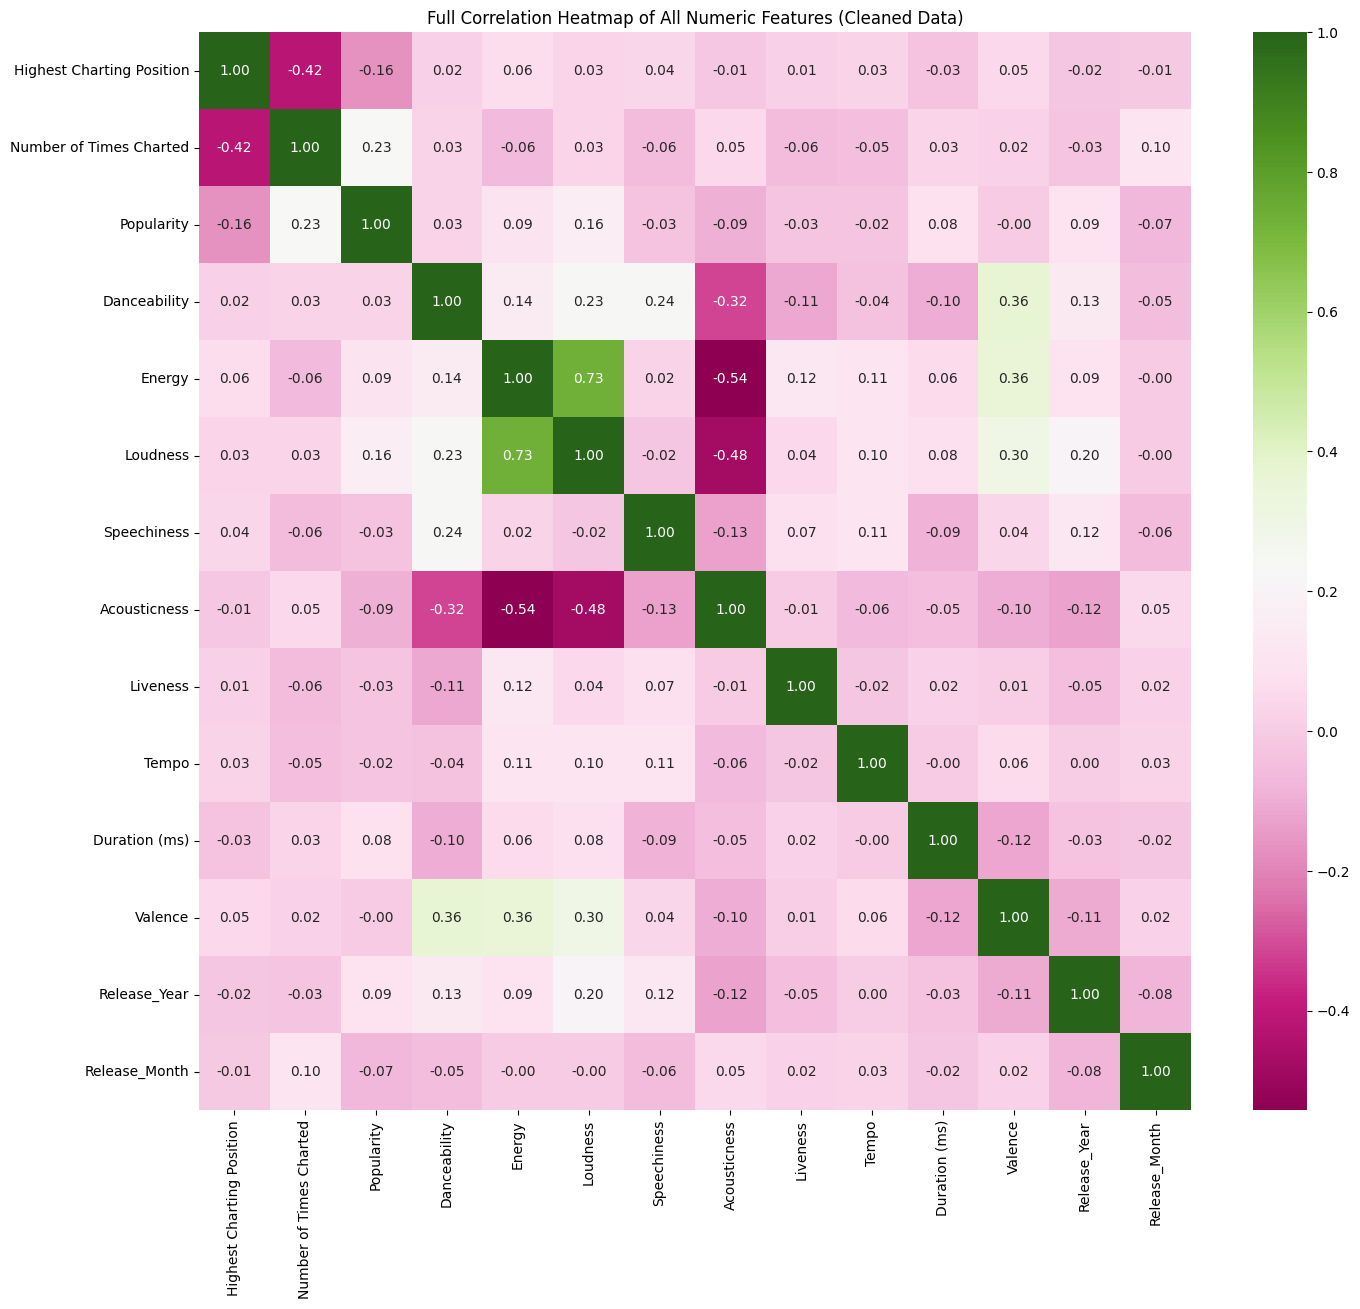

In [ ]:
# Select only numeric columns for the correlation matrix from the cleaned DataFrame
numeric_cleaned_df = cleaned_spotify_df.select_dtypes(include=np.number)

# Create the correlation matrix
corr_matrix = numeric_cleaned_df.corr()

plt.figure(figsize=(16, 14))
sns.heatmap(
    corr_matrix,
    annot=True, # This adds the numbers to the squares
    fmt='.2f', # Format numbers to 2 decimal places
    cmap='PiYG' # Color scheme
)
plt.title('Full Correlation Heatmap of All Numeric Features (Cleaned Data)')
plt.show()

####Feature Selection

In [ ]:
target = 'Popularity'

features_to_exclude_from_direct_numeric_predictors = [
    'Song Name',
    'Artist',
    'Release Date',
    'Highest Charting Position', # Leakage
    'Number of Times Charted' # Leakage
]

In [ ]:
X_candidates = cleaned_spotify_df.drop(columns=[target], errors='ignore')

for col in features_to_exclude_from_direct_numeric_predictors:
    if col in X_candidates.columns:
        X_candidates = X_candidates.drop(columns=[col])

In [ ]:
X = X_candidates.select_dtypes(include=np.number)
y = cleaned_spotify_df[target]

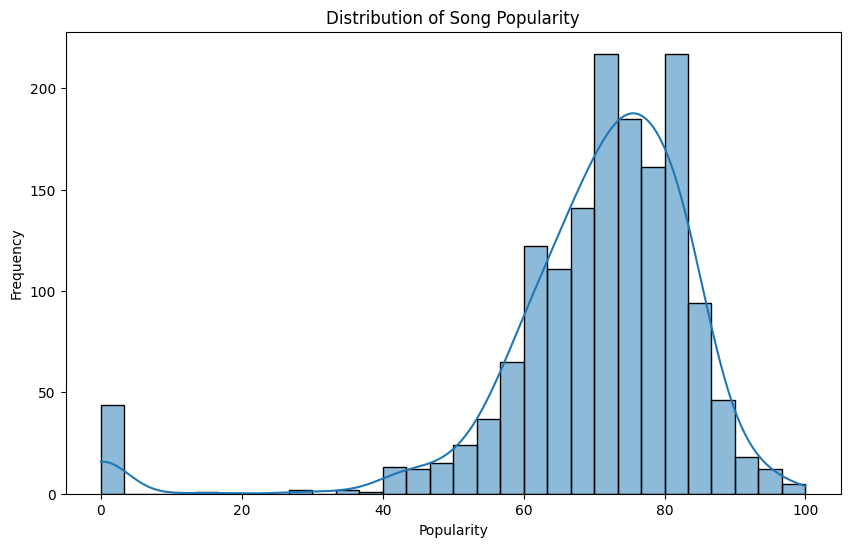

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_spotify_df['Popularity'], bins=30, kde=True)
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

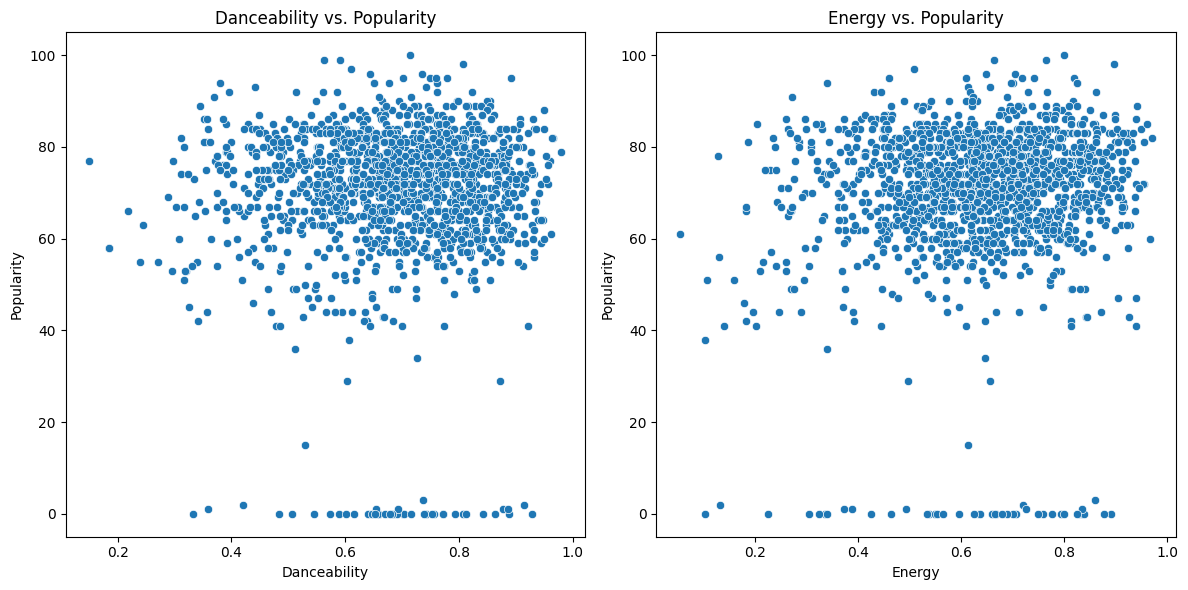

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Danceability', y='Popularity', data=cleaned_spotify_df)
plt.title('Danceability vs. Popularity')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Energy', y='Popularity', data=cleaned_spotify_df)
plt.title('Energy vs. Popularity')

plt.tight_layout()
plt.show()

#### Feature Engineering & Modeling

The 'Genre' and 'Chord' columns are dcategorical. I'll use one-hot encoding to convert them into a format the model can use. Then, I'll split the data and train two models: Linear Regression and Random Forest.

In [ ]:
encoded_spotify_df = pd.get_dummies(cleaned_spotify_df, columns=['Genre', 'Chord'], drop_first=True)

encoded_spotify_df.columns

Index(['Highest Charting Position', 'Number of Times Charted', 'Song Name',
       'Artist', 'Release Date', 'Popularity', 'Danceability', 'Energy',
       'Loudness', 'Speechiness',
       ...
       'Chord_B', 'Chord_C', 'Chord_C#/Db', 'Chord_D', 'Chord_D#/Eb',
       'Chord_E', 'Chord_F', 'Chord_F#/Gb', 'Chord_G', 'Chord_G#/Ab'],
      dtype='object', length=421)

## Processing



In [ ]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

#Use Sklearn

In [ ]:
X = encoded_spotify_df.drop(columns=['Popularity', 'Release Date', 'Song Name', 'Artist'], errors='ignore') # Drop 'Song Name', 'Artist' explicitly if not used
y = encoded_spotify_df['Popularity']

X = X.select_dtypes(include=np.number)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Changed random_state for consistency

In [ ]:
# Handle missing values in X_train and X_test

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns, index=X_test.index)

#### Decision Tree Regression

In [ ]:
numLoops = 500

mean_error = np.zeros(numLoops)

# np.random.seed(42)
for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2 )
  model = RandomForestRegressor( n_estimators = 10 ) #n_estimators is number of trees in forest. Note: you can also choose max_depth for RFs
  model.fit( X_train, y_train )
  y_pred = model.predict( X_test )
  mean_error[idx] = mean_squared_error( y_test, y_pred )

print(f'RMSE: {np.sqrt(mean_error).mean()}')
print(f'RMSE_std: {np.sqrt(mean_error).std()}')
np.sqrt(mean_error)[:50]


RMSE: 7.189321072719334
RMSE_std: 0.7395237613576805


array([ 6.70800855,  8.30503415,  7.1208591 ,  7.7124306 ,  6.60982646,
        6.86081222,  6.36170531,  7.08623946,  6.49984316,  6.58445261,
        8.27838844, 12.31550316,  7.66638103,  6.20722515,  6.28334471,
        7.82632476,  7.31139555,  6.81978134,  6.56004134,  7.4472275 ,
        7.95777083,  6.81014378,  5.95301452,  7.29276584,  7.67795778,
        6.25306915,  6.3374931 ,  6.45271825,  8.15298504,  6.44406855,
        7.2484816 ,  6.82053581,  7.61734735,  7.48447584,  7.43544167,
        7.86221763,  6.91203163,  7.48360235,  6.35406248,  6.49163016,
        7.82273262,  6.89814008,  6.18837254,  7.37929185,  7.15261511,
        7.63942889,  7.18583873,  7.5317    ,  7.34521838,  6.01634236])

####Random Forest

In [ ]:
num_trees = range(10,60,10)
cv_loops = 100
rmse_results = np.zeros(len(num_trees))
std_results = np.zeros(len(num_trees))

for n, trees in enumerate(num_trees):
  rmse_cv = np.zeros(cv_loops)
  # np.random.seed(42)
  for i in range(cv_loops):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
    rfModel = RandomForestRegressor( n_estimators=trees )
    rfModel.fit(X_train, y_train)
    y_pred_rf = rfModel.predict(X_test)
    rmse_cv[i] = np.sqrt(mean_squared_error(y_test, y_pred_rf))

  print(trees,' trees finished.')
  rmse_results[n] = rmse_cv.mean()
  std_results[n] = rmse_cv.std()

10  trees finished.
20  trees finished.
30  trees finished.
40  trees finished.
50  trees finished.


In [ ]:
rmse_results, std_results

(array([7.19045338, 6.94512048, 6.80853577, 6.77231699, 6.70957092]),
 array([0.61530057, 0.63754029, 0.48189124, 0.48845078, 0.60541278]))

In [ ]:
pickle.dump(rfModel, open('rfModel.p','wb')) #takes the tree model and save it to a file through 'pickle'

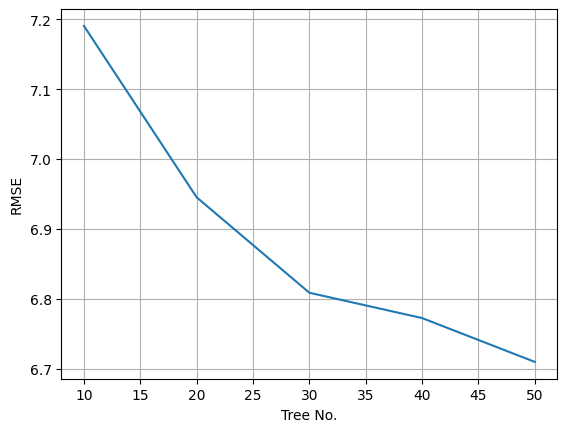

In [ ]:
plt.plot(num_trees, rmse_results)
plt.xlabel('Tree No.')
plt.ylabel('RMSE')
plt.grid()

#will not output on plot of origin

In [ ]:
print(f'RMSE with 30 trees: {rmse_results[2]}')

RMSE with 30 trees: 6.80853576745987


In [ ]:
import graphviz
from IPython.display import display
from sklearn import tree

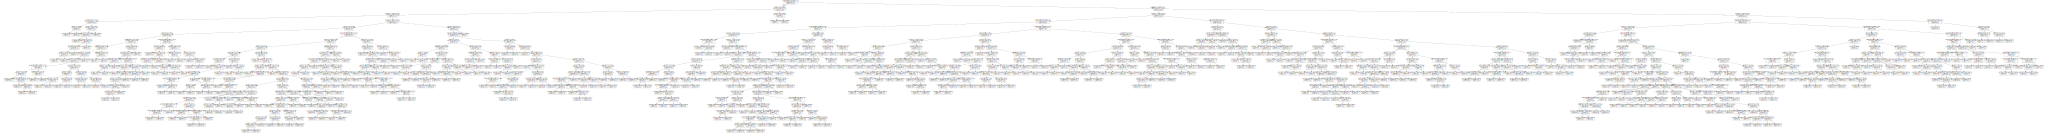

In [ ]:
# Display one tree from the random forest
display(
  graphviz.Source(
    tree.export_graphviz(
      rfModel.estimators_[0],
      feature_names = X.columns,
    )
  )
)

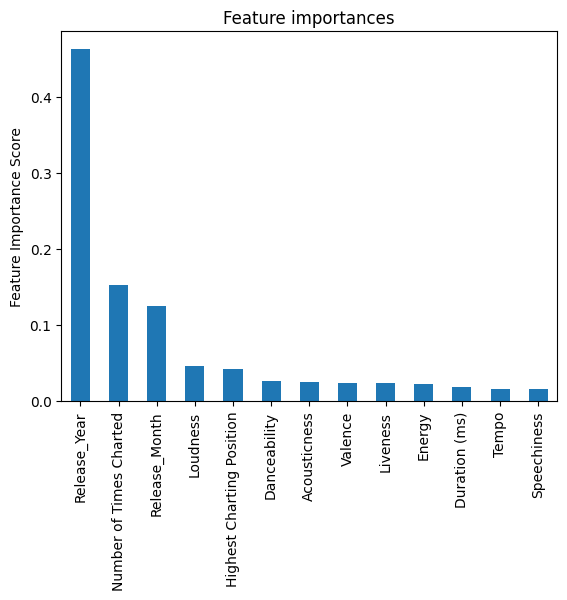

In [ ]:
importances = rfModel.feature_importances_
forest_importances = pd.Series( importances, index = X.columns )

plt.figure()
# forest_importances.plot.bar()
forest_importances.sort_values( ascending = False ).plot.bar()
plt.title("Feature importances")
plt.ylabel('Feature Importance Score') ;

In [ ]:
( forest_importances.sort_values( ascending = False ) * 100 ).cumsum()

,0
Release_Year,46.246591
Number of Times Charted,61.542399
Release_Month,74.081415
Loudness,78.747327
Highest Charting Position,82.928017
Danceability,85.560017
Acousticness,88.037943
Valence,90.448575
Liveness,92.778360
Energy,94.984745


## Data Visualization/Communication of Results


[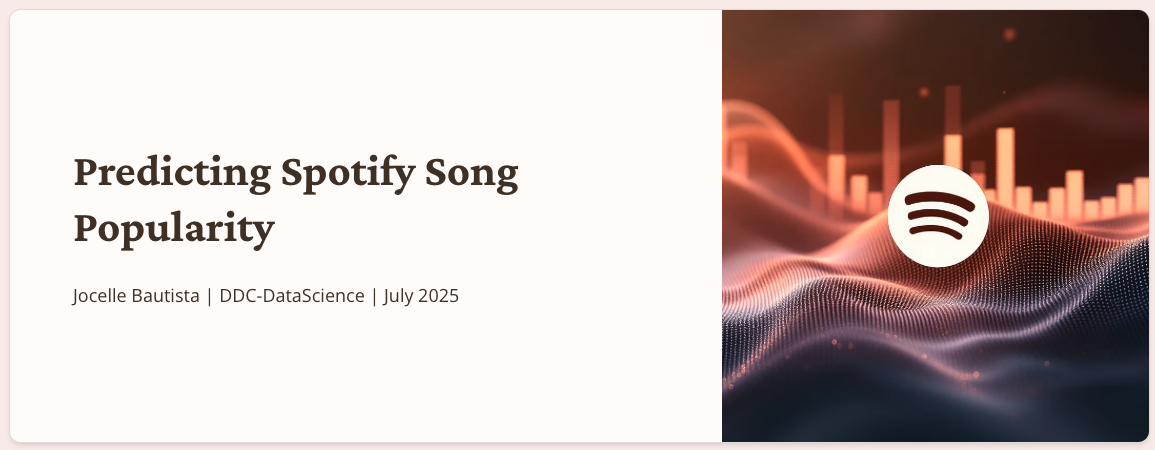](https://predicting-spotify-song--b4zt6bg.gamma.site/)